In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.linear_model import LinearRegression, LogisticRegression

import metrics as my

import warnings
warnings.filterwarnings("ignore")

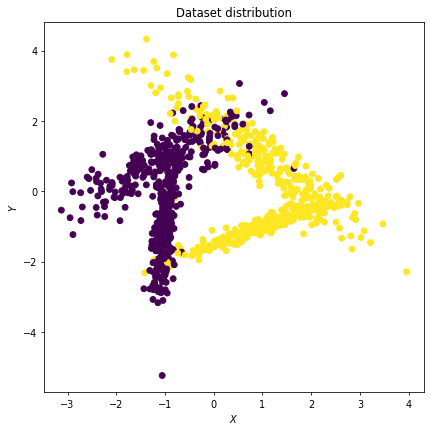

In [5]:
X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_classes=2,
                           random_state=100)

plt.figure(figsize=(7, 7), dpi=70)
plt.title("Dataset distribution")
plt.xlabel(r"$X$")
plt.ylabel(r"$Y$")
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [35]:
# Split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.5, random_state=2)

# model = KNeighborsClassifier(n_neighbors=50) # LogisticRegression() 
# model.fit(train_x, train_y)
labels = np.array(np.random.random_sample(size=500) >= 0.5, dtype=int)
confidence = np.random.random_sample(size=int(500))
predicts_prob = np.array([i if label else 1 - i for label, i in zip(labels, confidence)])

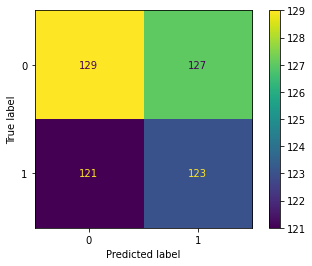

In [36]:
cm = confusion_matrix(test_y, labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [37]:
my_metrics = my.metrics(test_y, labels)

assert cm[0, 0] == my_metrics['TN'] 
assert cm[0, 1] == my_metrics['FP']
assert cm[1, 0] == my_metrics['FN']
assert cm[1, 1] == my_metrics['TP']

In [38]:
lib_fpr, lib_tpr, _ = roc_curve(test_y, conf)
lib_roc_auc = auc(lib_fpr, lib_tpr)

fpr, tpr = my.getROCCurve(conf, test_y)
my_roc_auc = np.abs(np.trapz(fpr, tpr))

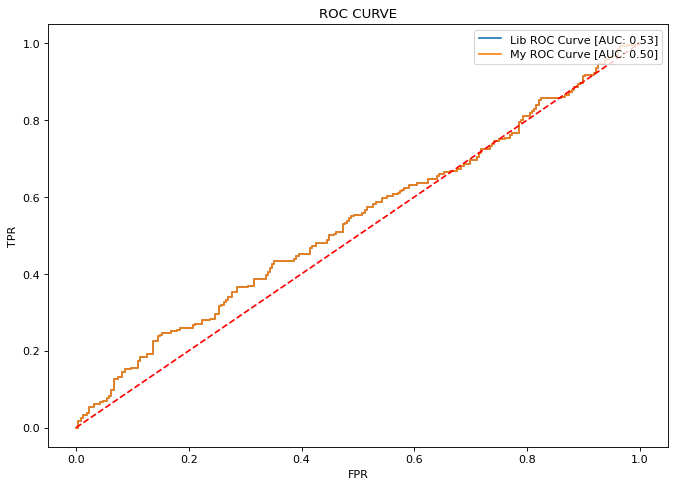

In [42]:

plt.figure(figsize=(10, 7), dpi=80)
plt.title("ROC CURVE")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(lib_fpr, lib_tpr, label=f'Lib ROC Curve [AUC: {lib_roc_auc:.2f}]')
plt.plot(fpr, tpr, label=f'My ROC Curve [AUC: {my_roc_auc:.2f}]')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(loc='upper right')
plt.show()

In [43]:
lib_prs, lib_rec, _ = precision_recall_curve(test_y, conf)
lib_pr_auc = auc(lib_rec, lib_prs)

prs, rec = my.getPRCurve(conf, test_y)
my_pr_auc = np.trapz(prs, rec)

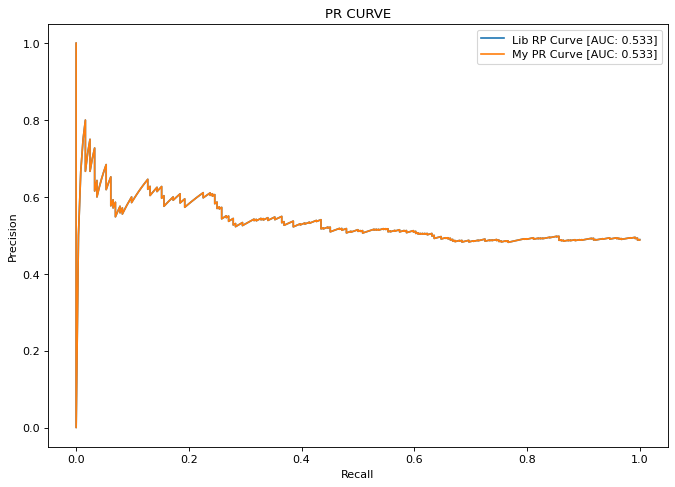

In [44]:
plt.figure(figsize=(10, 7), dpi=80)

plt.title("PR CURVE")
plt.xlabel("Recall")
plt.ylabel("Precision")


plt.plot(lib_rec, lib_prs, label=f'Lib RP Curve [AUC: {lib_pr_auc:.3f}]')
plt.plot(rec, prs, label=f'My PR Curve [AUC: {my_pr_auc:.3f}]')

plt.legend(loc='upper right')
plt.show()